# APPM 5370 Homework 3
## Soroush Khadem

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')
import math

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

### Problem 5: Spike Time Distribution of Noisy Integrate-and-Fire Model

### Part A: Mean

After performing the analysis, the result obtained was: $$ \mu(\theta) = \theta $$

In [3]:
def analytic_mean(theta):
    return theta

The perfect integrate and fire model is:
$$
\frac{du}{dt} = 1 + \xi(t), \ \ \ \ \ \ \ {\rm if} \ u(T) = \theta, \ u(T^+) \mapsto 0,
$$
Therefore, the stochastic version of Euler's method is:
$$
u(t + \Delta t) = u(t) + \Delta t (1) + \sqrt{2 \Delta t} {\mathcal N}(0,1).
$$
where ${\mathcal N}(0,1)$ represents a normal random variable.

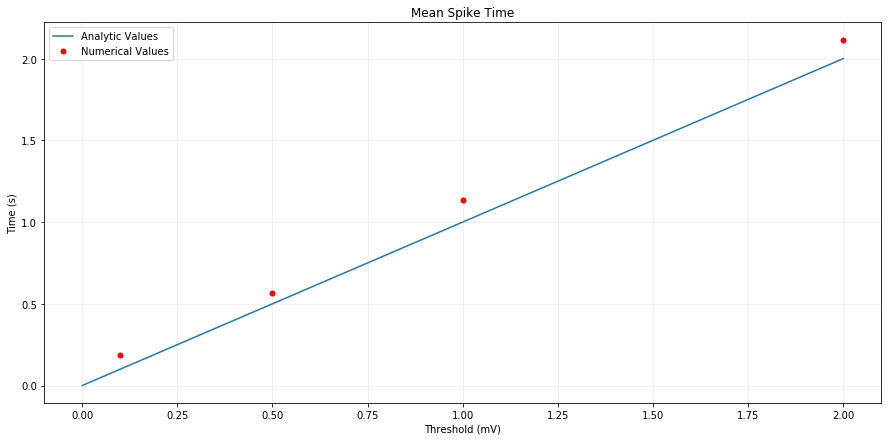

In [4]:
dt = 0.01 # time step
s = 1 # noise standard deviation
Nsim = 1000 # total number of simulations to run to obtain isi data

# Calculate analytic
a_means = []
a_inputs = np.arange(0,2.1,0.1)
for i in a_inputs:
    a_means.append(analytic_mean(i)) # note: scaled by dt to match up time scales 

# Now, simulate numerical
n_inputs = [0.1, 0.5, 1, 2]
isi = np.zeros([len(n_inputs), Nsim]) # initialize 2D vector of spike times (ms)
for n,th in enumerate(n_inputs):
    for j in np.arange(Nsim):
        u=0
        t=0
        while u<th:
            u = u + dt*(1) + np.sqrt(2*dt)*s*rnd.randn();
            t = t + dt
        isi[n][j-1] = t


n_means = np.mean(isi, axis=1)        
    
fig = plt.figure()     
plt.grid(True, alpha=0.2)
plt.plot(a_inputs, a_means)
plt.plot(n_inputs, n_means, 'r.', markersize=10)
plt.title('Mean Spike Time')
plt.xlabel('Threshold (mV)')
plt.ylabel('Time (s)')
plt.legend(['Analytic Values', 'Numerical Values'])
plt.show()

The results match the analytic results quite well. After playing around with the simulation a few times, it seems the simulated data is consistantly higher than the analytic.

### Part B: Variance

The variance was found to be: $$ \sigma^2(\theta) =2\theta $$

In [5]:
def analytic_variance(theta):
    return 2*theta

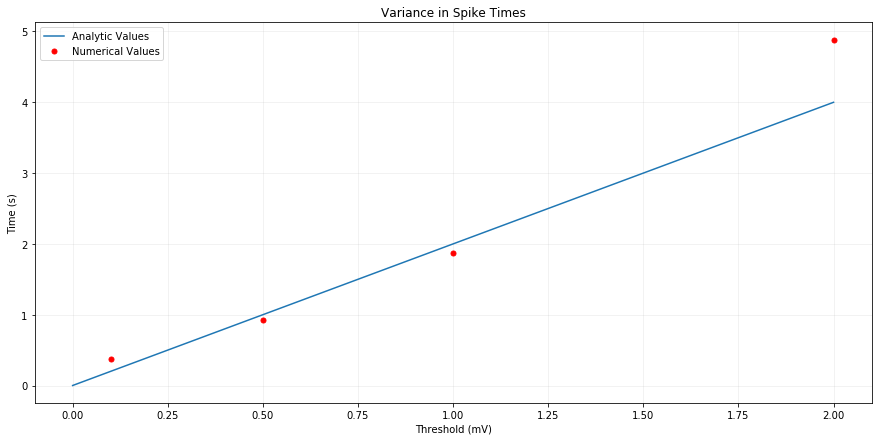

In [6]:
dt = 0.01 # time step
s = 1 # noise standard deviation
Nsim = 1000 # total number of simulations to run to obtain isi data

# Calculate analytic
a_vars = []
a_inputs = np.arange(0,2.1,0.1)
for i in a_inputs:
    a_vars.append(analytic_variance(i)) # note: scaled by dt to match up time scales 

# Now, simulate numerical
isi = np.zeros([len(n_inputs), Nsim]) # initialize 2D vector of spike times (ms)
n_inputs = [0.1, 0.5, 1, 2]
for n,th in enumerate(n_inputs):
    for j in np.arange(Nsim):
        u=0
        t=0
        while u<th:
            u = u + dt*(1) + np.sqrt(2*dt)*s*rnd.randn();
            t = t + dt
        isi[n][j-1] = t

# calculate variance
n_vars = np.var(isi, axis=1)        
    
fig = plt.figure()     
plt.grid(True, alpha=0.2)
plt.plot(a_inputs, a_vars)
plt.plot(n_inputs, n_vars, 'r.', markersize=10)
plt.title('Variance in Spike Times')
plt.xlabel('Threshold (mV)')
plt.ylabel('Time (s)')
plt.legend(['Analytic Values', 'Numerical Values'])
plt.show()

The results match the analytic results quite well.

### Part C: Distribution

$$ f(t; \mu(1), \sigma(1)) = \frac{1}{4\pi}e^{\frac{-(t-1)^2}{4\pi}} $$

In [7]:
def analytic_distribution(t, theta, dt=1):
    return (1/math.sqrt(2*math.pi*dt*analytic_variance(theta))) * \
            math.e**(-((t-analytic_mean(theta))**2)/(2*dt*analytic_variance(theta)))

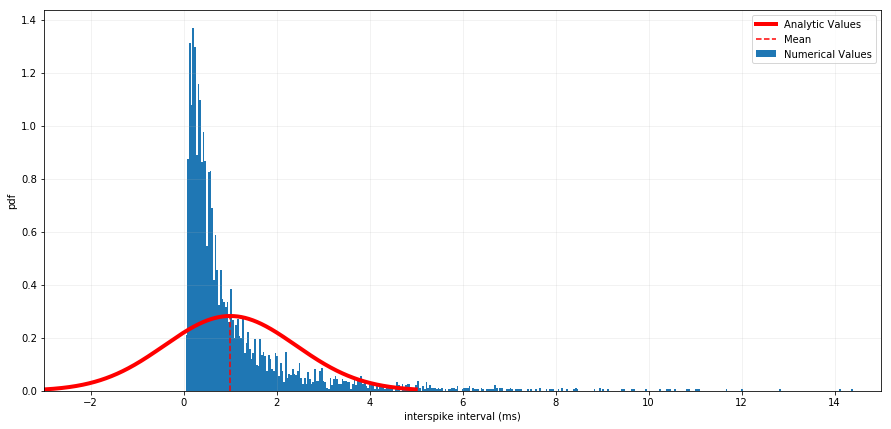

In [8]:
dt = 0.01 # time step
s = 1 # noise standard deviation
Nsim = 5000 # total number of simulations to run to obtain isi data
th = 1

# Calculate analytic
a_dist = []
a_inputs = np.arange(-3,5,0.01)
for i in a_inputs:
    a_dist.append(analytic_distribution(i, th))

# Now, simulate numerical
isi = np.zeros(Nsim) # initialize vector of spike times (ms)
n_inputs = [0.1, 0.5, 1, 2]
for j in np.arange(Nsim):
    u=0
    t=0
    while u<th:
        u = u + dt*(1) + np.sqrt(2*dt)*s*rnd.randn();
        t = t + dt
    isi[j-1] = t
    

fig = plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(a_inputs, a_dist, 'r', linewidth=4)
plt.plot([1,1],[0,np.max(a_dist)], 'r--')
plt.xlim([-3,15])
vals, _, _ = plt.hist(isi, bins=500, normed=True)
plt.xlabel('interspike interval (ms)')         # label for x-axis
plt.ylabel('pdf')      # label for y-axis
plt.legend(['Analytic Values', 'Mean', 'Numerical Values'])
plt.show()

The simulated data does not exactly fit a normal distribution for a number of reasons. First, time can never be negative, so anything less than zero is not possible. Already, nearly half the distrubtion is thrown out. Also, due to the random nature of the noise added, there is a long tail to the simulated distribution, making it skewed right.



### Problem 6: Fiiting Poisson Spiking Model to Itself (Maximum Likelihood)

In [9]:
def L_lambda_given_x(_lambda, xs):
    return _lambda**(len(xs))*math.e**-(_lambda*np.sum(xs))

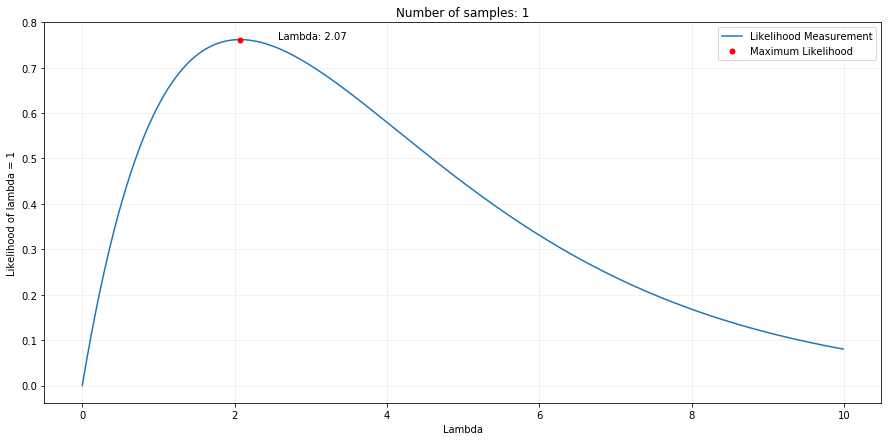

In [14]:
xs = [rnd.exponential()]
likelihoods = []
inputs = np.arange(0, 10, 0.01)
for l in inputs:
    likelihoods.append(L_lambda_given_x(l, xs))

max_x = inputs[np.argmax(likelihoods)]
max_y = np.max(likelihoods)
    
fig = plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(inputs, likelihoods)
plt.plot(max_x, max_y, 'r.', markersize=10)
plt.text(max_x + 0.5, max_y, 'Lambda: %s'%max_x)
plt.title('Number of samples: %s'%len(xs))
plt.xlabel('Lambda')
plt.ylabel('Likelihood of lambda = 1')
plt.legend(['Likelihood Measurement', 'Maximum Likelihood'])
plt.show()

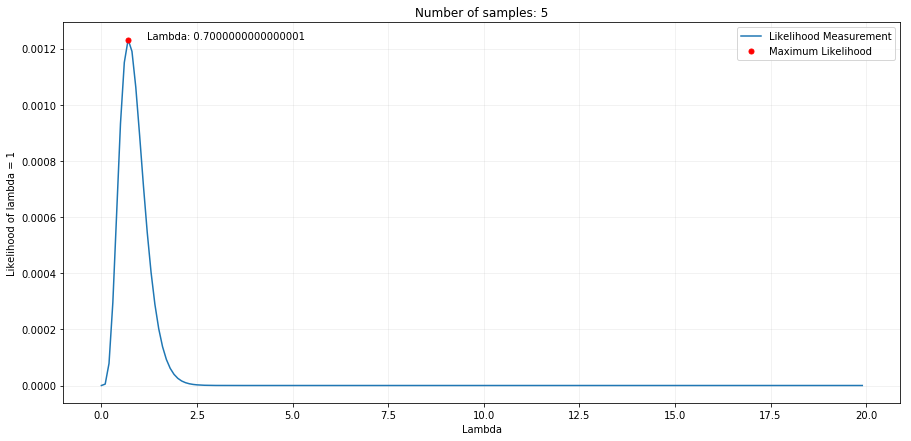

In [17]:
xs = [rnd.exponential() for _ in range(0,5)]
likelihoods = []
inputs = np.arange(0, 20, 0.1)
for l in inputs:
    likelihoods.append(L_lambda_given_x(l, xs))

max_x = inputs[np.argmax(likelihoods)]
max_y = np.max(likelihoods)
    
fig = plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(inputs, likelihoods)
plt.plot(max_x, max_y, 'r.', markersize=10)
plt.text(max_x + 0.5, max_y, 'Lambda: %s'%max_x)
plt.title('Number of samples: %s'%len(xs))
plt.xlabel('Lambda')
plt.ylabel('Likelihood of lambda = 1')
plt.legend(['Likelihood Measurement', 'Maximum Likelihood'])
plt.show()

Using 5 samples, the value of lambda is more consistent. Although on some trials it may actually be farther away from 1, it has a much skinnier peak, meaning its variance is less.

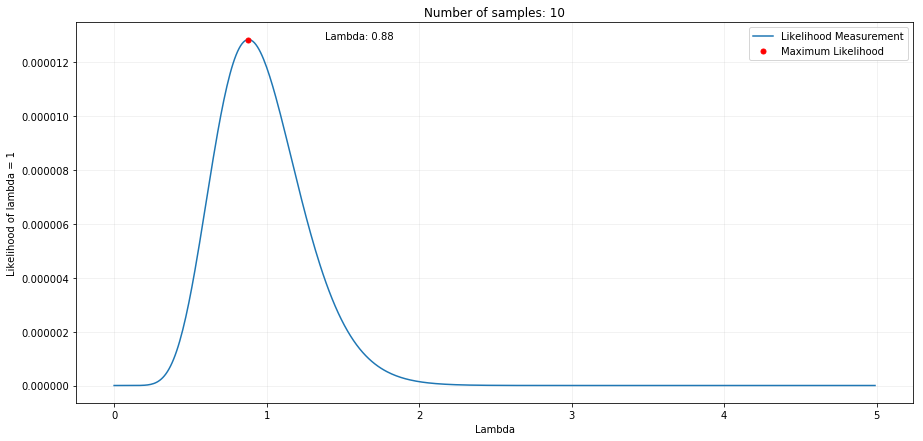

In [19]:
xs = [rnd.exponential() for _ in range(0,10)]
likelihoods = []
inputs = np.arange(0, 5, 0.01)
for l in inputs:
    likelihoods.append(L_lambda_given_x(l, xs))

max_x = inputs[np.argmax(likelihoods)]
max_y = np.max(likelihoods)
    
fig = plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(inputs, likelihoods)
plt.plot(max_x, max_y, 'r.', markersize=10)
plt.text(max_x + 0.5, max_y, 'Lambda: %s'%max_x)
plt.title('Number of samples: %s'%len(xs))
plt.xlabel('Lambda')
plt.ylabel('Likelihood of lambda = 1')
plt.legend(['Likelihood Measurement', 'Maximum Likelihood'])
plt.show()

As before, the peak with 10 samples is closer to 1 overall, but still has some variation.

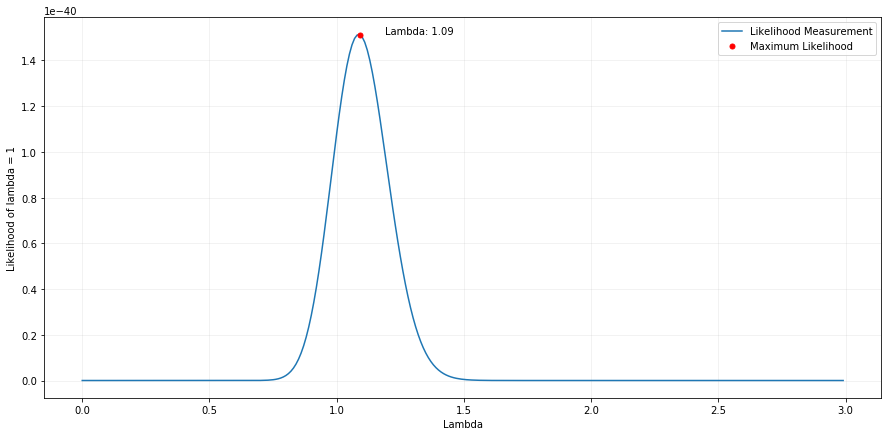

In [13]:
xs = [rnd.exponential() for _ in range(0,100)]
likelihoods = []
inputs = np.arange(0, 3, 0.01)
for l in inputs:
    likelihoods.append(L_lambda_given_x(l, xs))

max_x = inputs[np.argmax(likelihoods)]
max_y = np.max(likelihoods)
    
fig = plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(inputs, likelihoods)
plt.plot(max_x, max_y, 'r.', markersize=10)
plt.text(max_x + 0.1, max_y, 'Lambda: %s'%max_x)
plt.xlabel('Lambda')
plt.ylabel('Likelihood of lambda = 1')
plt.legend(['Likelihood Measurement', 'Maximum Likelihood'])
plt.show()

With 100 samples, the peak is almost always very close to the true value, 1. If the number of samples $\rightarrow \infty$, I think the peak would equal 1.